## Battle of Neighbourhoods - Week 2

## Optimal Choice Analysis of Buying House in Nashua, NH
## By - Parul Agarwal

## 1. Introduction
#### Description & Discussion of the Background

The study of optimal choice analysis of buying house in Nashua, NH is inspired by my friend ‘Emma’ who works with ‘Oracle Corporation’ in Seattle, WA; and is planning to move to ‘Oracle’ office in Nashua, NH. Emma has a daughter who is 5 years old, and when buying a house; proximity of house from office and school with good rating near the house would play a very important role in her decision. 

Nashua ‘The Gate City’ was twice named the ‘Best Place to Live in America’ in 1987 and again in 1998, and again in year 2017, this city was ranked in top 50 U.S. cities to live. With great neighborhood, extremely low crime rate, excellent schooling, very low-income taxes and being very close to Boston makes Nashua a great city to raise kids, buy properties and even retire.

When I talked to Emma, she was excited to move to Nashua, leaving the busy city life and coming to Nashua, and as I have been living in Nashua for last decade; has asked me if I can narrow down the choices and provide her with list of houses that she might be interested in. 


## 2. A description of the data and how it will be used to solve the problem

#### 2.1 Description of Data


To appropriately address Emma’s requests, I approached them as follows:

-	Collected data from ColdwellBankerHomes.com, from which I collected details of houses such as Price, number of bedrooms, location (Latitude, Longitude), Area (Sq. Ft.), zip code and more

-	Carefully inspecting HTML data from the website for search requests, I scraped data using Python and cleaned before storing in appropriate format for further use.

-	This rich data was overwhelming and Emma is looking for houses with at least 3 bedrooms and price, not more than $400,000. Therefore, I filtered that data to match the needs.

-	With help of geospatial data (Latitude and Longitude), I plotted the data on the map for better visualization.

-	This marker for house on sales are added with hover tooltip, to see more details

-	From Nashua School District website:  www.nashua.edu, I collected the information about street name and which school they belong to.

-	Combining the data from www.nashua.edu with house listing data fetched from ColdwellBankerHomes.com gave more information about school zone for each house in the market

-	Now it should be easy to filter houses in certain school group which would match Emma’s needs

-	Using FourSquare.com, I collected venue information relative to geolocation of houses listed and ranked them.

-	Finally, once all of the above data is cleaned and prepared, with the help of Clustering the data, the map would show the clusters of houses which fall in certain school range, and the visualization would be very helpful for Emma to view selective houses of her interest.


#### 2.2 Data Source

##### ColdwellBankerHomes.com
##### www.nashua.edu
##### FourSquare.com

#### 2.3 Data Detail



<h1 align=left><font size = 4>Build data frame from www.coldwellbankerhomes.com for Nashua, NH</font></h1>

In [167]:
# Load dependencies

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


<h5>Scrape available houses  information from www.coldwellbankerhomes.com</h5>

In [168]:
from requests import get

In [169]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

In [170]:
sapo = "https://www.coldwellbankerhomes.com/nh/nashua?sortId=2&offset=12"
response = get(sapo, headers=headers)

In [171]:
html_soup = BeautifulSoup(response.text, 'html.parser')

In [172]:
house_containers = html_soup.find_all('div', class_="property-snapshot-psr-panel")

In [173]:
first = house_containers[0]
first.find_all('span')

[<span class="notranslate" itemprop="name">37 Majestic Ave, Nashua, NH 03063</span>,
 <span class="notranslate" itemprop="description">View this property at 37 Majestic Ave, Nashua, NH 03063</span>,
 <span class="notranslate" itemprop="streetAddress">37 Majestic Ave</span>,
 <span class="notranslate" itemprop="addressLocality">Nashua</span>,
 <span class="notranslate" itemprop="addressRegion">NH</span>,
 <span itemprop="postalCode">03063</span>,
 <span class="status"><span class="flag just-listed icon-house"></span><span class="property-status-indicator-text">Just Listed</span></span>,
 <span class="flag just-listed icon-house"></span>,
 <span class="property-status-indicator-text">Just Listed</span>,
 <span class="prev owl"><a class="nav-prev"></a></span>,
 <span class="next owl"><a class="nav-next"></a></span>,
 <span aria-hidden="true" class="icon-heart"></span>,
 <span class="visually-hidden">Save</span>,
 <span class="office-name notranslate">Redfin Corporation</span>,
 <span aria

In [174]:
import itertools 

In [246]:
%%time

addressArray = []
zipcodeArray = []
priceArray = []
latArray = []
lngArray = []
boroughArray = []
areaArray = []
bedroomArray = []
persqftArray = []

n_pages = 0

for page in range(0,20):
    n_pages += 1
    
    sapo_url = 'https://www.coldwellbankerhomes.com/nh/nashua?sortId=2&offset='+str(page*12)
    
 
    r = get(sapo_url, headers=headers)
    page_html = BeautifulSoup(r.text, 'html.parser')
    house_containers = page_html.find_all('div', class_="property-snapshot-psr-panel")
    
    if house_containers != []:
        for container in house_containers:
            
            # Latitude
            latArray.append(container['data-lat'])
            
            # Longitude
            lngArray.append(container['data-lng'])
            
            # Address
            location = container.find_all('div', class_="street-address")[0].text
            addressArray.append(location)

            # Zip
            zipcode = str(container.find_all('div', class_="city-st-zip")[0].text[-5:])
            zipcodeArray.append(zipcode)
            
             # Area_ft2
            area = container.find_all('li', class_="sq.-ft.")
            
            if area != [] :
                area = area[0].text.replace("Sq. Ft.","").replace(",","")
            else:
                area = 0
            areaArray.append(area)
            
             # Bedrooms
            bedroom = container.find_all('li', class_="beds")
            
            if bedroom != [] :
                bedroom = bedroom[0].text.replace("Beds","")
            else:
                bedroom = 0
            bedroomArray.append(bedroom)
            
        
            
            # Borough
            borough = str(container.find_all('div', class_="city-st-zip")[0].text[:6])
            boroughArray.append(borough)

            # Price
            price = container.find_all('div', class_="price-normal")[0].text.replace("$","").replace(",","")
            priceArray.append(price)
            
            # Price Per sq ft
            if int(area) > 0 :
                persqft = float(int(price)/int(area))
            else :
                persqft = 0
            
            persqftArray.append(persqft)
            
    else:
        break
    
    
print('You scraped {} pages containing {} properties.'.format(n_pages, len(address)))

You scraped 20 pages containing 10 properties.
CPU times: user 11.7 s, sys: 100 ms, total: 11.8 s
Wall time: 37.5 s


<h5>Build Pandas dataframe along with Latitude and Longitude</h5>

In [248]:
cols = ['Borough','Address', 'ZipCode', 'BedRooms', 'Area_ft2', 'Price', 'Price_ft2','Latitude', 'Longitude']

listNashua = pd.DataFrame({'Borough': boroughArray,
                           'Address': addressArray,
                           'ZipCode': zipcodeArray,
                           'BedRooms': bedroomArray,
                           'Area_ft2': areaArray,
                           'Price': priceArray,
                           'Price_ft2':persqftArray,
                           'Latitude': latArray,
                           'Longitude': lngArray
                           })[cols]

listNashua.to_excel('listNashua.xlsx')

listNashua = pd.read_excel('listNashua.xlsx')
listNashua

listNashua['ZipCode'] = listNashua['ZipCode'].astype(str).str.zfill(5)
print(listNashua)

     Unnamed: 0 Borough                            Address ZipCode  BedRooms  \
0             0  Nashua                   37 Majestic Ave    03063         3   
1             1  Nashua                     7 Syracuse Rd    03064         4   
2             2  Nashua                       42 Norma Dr    03062         3   
3             3  Nashua                   14 Artillery Ln    03064         3   
4             4  Nashua              15 Cannongate III Rd    03063         2   
5             5  Nashua        107 Tolles N Of Lock St St    03064         3   
6             6  Nashua                    90 Chandler St    03064         3   
7             7  Nashua                  5 Autumn Leaf Dr    03060         2   
8             8  Nashua                  82 Cherrywood Dr    03062         3   
9             9  Nashua                       23 Amble Rd    03062         3   
10           10  Nashua                     109 Bowers St    03060         0   
11           11  Nashua                 

In [249]:
listNashua.shape

(480, 10)

In [625]:
# Save data on desktop file name NH_houselist
listNashua.to_csv(r'/Users/parul/Desktop/NH_houselist.csv',index=False) 

<h1 align=left><font size = 4>Explore and cluster the neighborhoods in Nashua</font></h1>

In [250]:
import folium
from geopy.geocoders import Nominatim

#### Create a map of Nashua with neighborhoods superimposed on top.

In [251]:
address = 'Nashua, NH'

geolocator = Nominatim(user_agent="nashua_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nashua is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nashua is 42.7653662, -71.467566.


In [263]:
# create map of Nashua using latitude and longitude values
map_Nashua = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, address in zip(listNashua['Latitude'], listNashua['Longitude'], listNashua['Borough'], listNashua['Address']):
    label = '{}, {},  ${}'.format(address, borough, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Nashua)  
    
map_Nashua

#     3. METHODOLOY EXECUTION  - Mapping Data

# Nashua houses for sale price statistics

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/parul/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


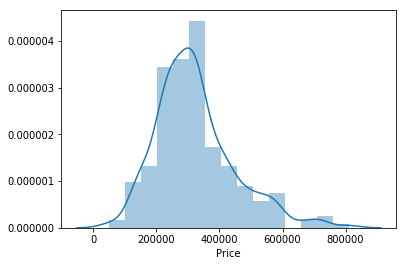

In [254]:
sns.distplot(listNashua['Price'],bins=15)
plt.show()

/Users/parul/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


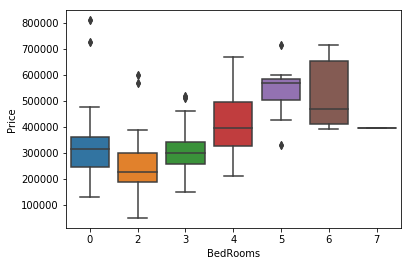

In [255]:
sns.boxplot(x='BedRooms', y= 'Price', data=listNashua)
plt.show()

/Users/parul/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


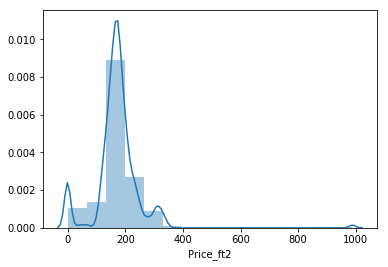

In [256]:
import seaborn as sns
sns.distplot(listNashua['Price_ft2'],bins=15)
plt.show()

In [580]:
cd


/Users/parul


## Explore and cluster the neighborhoods school in Nashua

In [596]:
# A csv file summarized the school and the addresses for next step to determine geodata
school=pd.read_csv("Desktop/Schoolrating.csv")
school.head()

,Street Name,Elementary School,School Rating
0,Abbe Ln,Birch Hill,4
1,Abbott St,Mt. Pleasant,2
2,Aberdeen Ln,Main Dunstable,6
3,Acacia St,Main Dunstable,6
4,Academy Dr,Charlotte Ave,5


In [597]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
import numpy as np
sLength = len(school['Street Name'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
school = school.assign(lat=lat.values)
school = school.assign(long=long.values)

In [598]:
school.head()

,Street Name,Elementary School,School Rating,lat,long
0,Abbe Ln,Birch Hill,4,0.160432,-0.255518
1,Abbott St,Mt. Pleasant,2,-0.934223,0.353332
2,Aberdeen Ln,Main Dunstable,6,0.900599,1.525229
3,Acacia St,Main Dunstable,6,0.446939,0.695155
4,Academy Dr,Charlotte Ave,5,-1.722344,-0.152028


In [611]:

for n in range(1360,len(school)): 
    address1= school['Street Name'][n] 
    geolocator = Nominatim(user_agent="nashua_explorer") 
    location = geolocator.geocode(address1+',Nashua, NH') 
   
    print(n)
    #print('{}, {}, {} , {}'.format(n,address1,location.latitude,location.longitude))
    school['lat'][n] = location.latitude 
    school['long'][n] = location.longitude 
    
print('Geodata completed')

1360


/Users/parul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/parul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
Geodata completed


In [612]:
school.head()

,Street Name,Elementary School,School Rating,lat,long
0,Abbe Ln,Birch Hill,4,42.748814,-71.527122
1,Abbott St,Mt. Pleasant,2,42.769575,-71.469794
2,Aberdeen Ln,Main Dunstable,6,42.719241,-71.495093
3,Acacia St,Main Dunstable,6,42.729208,-71.504340
4,Academy Dr,Charlotte Ave,5,42.787055,-71.465856


In [613]:
# Save data on desktop file name NH_school1
school.to_csv(r'/Users/parul/Desktop/NH_school1.csv',index=False) 

In [615]:
school.tail()
school.shape

(1528, 5)

In [629]:
cd

/Users/parul


In [630]:
ClusSchool = pd.read_csv("Desktop/NH_School1.csv")

In [631]:
ClusSchool.head()

,Street Name,Elementary School,School Rating,lat,long
0,Abbe Ln,Birch Hill,4,42.748814,-71.527122
1,Abbott St,Mt. Pleasant,2,42.769575,-71.469794
2,Aberdeen Ln,Main Dunstable,6,42.719241,-71.495093
3,Acacia St,Main Dunstable,6,42.729208,-71.504340
4,Academy Dr,Charlotte Ave,5,42.787055,-71.465856


## Grouping Street Name by Elementary School

In [656]:
NewClusSchool = pd.read_csv("Desktop/NewClusSchool.csv")

In [657]:
NewClusSchool.head(20)

,Elementary School,Street Name,Latitude,Longitude
0,Amherst St School,"Amherst St , Amherst Ter , Artillery Ln , Aub...",42.409300,-72.449500
1,Bicentennial School,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",42.713700,-71.472400
2,Birch Hill School,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",42.766200,-71.513300
3,Broad Street School,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",42.758000,-71.513100
4,Charlotte Ave School,"Academy Dr , Adams St , Adella Dr , Amherst S...",42.774400,-71.482700
5,Dr. Crisp School,"Allds St , Alpine St , Alstead Ave , Amory St...",42.756972,-71.447451
6,Fairgrounds School,"Acton St , Alan St , Alder Dr , Almont St , A...",42.742713,-71.477391
7,Ledge St School,"Althea Ln , Arthurs Ln , Ash Ct , Ash St , As...",42.755052,-71.481134
8,Main Dunstable School,"Aberdeen Ln , Acacia St , Alford Ln , Annabel...",42.718900,-71.510900
9,Mt. Pleasant School,"Abbott St , Aetna Ct , Atherton Ave , Atwood ...",41.646920,-70.951865


In [644]:
NewClusSchool.shape

(13, 4)

## Map of Nashua showing Elementary Schools on it.

In [658]:
#The geograpical coordinate of Nashua is 42.7653662, -71.467566.

# create map of Nashua using latitude and longitude values
map_ScNashua = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ElementarySchool in zip(NewClusSchool['Latitude'], NewClusSchool['Longitude'], NewClusSchool['Elementary School']):
    label = '{}'.format(ElementarySchool)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ScNashua)  
    
map_ScNashua

## Map of Nashua showing houses for sale and the school locations nearby
Now, we can visualize the desirable houses for sale and their nearest school. Popups display house address and sale price and the school name.
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a house to an specific school

In [650]:
# houselist contains all the houses available for sale in Nashua
houselist=pd.read_csv("Desktop/NH_houselist.csv")
houselist.head()

,Unnamed: 0,Borough,Address,ZipCode,BedRooms,Area_ft2,Price,Price_ft2,Latitude,Longitude
0,0,Nashua,37 Majestic Ave,3063,3,2712,441000,162.610620,42.7535,-71.5242
1,1,Nashua,7 Syracuse Rd,3064,4,1970,295000,149.746193,42.7856,-71.4628
2,2,Nashua,42 Norma Dr,3062,3,1779,254900,143.282743,42.7408,-71.5166
3,3,Nashua,14 Artillery Ln,3064,3,1602,239900,149.750312,42.7686,-71.4707
4,4,Nashua,15 Cannongate III Rd,3063,2,1188,209900,176.683502,42.7827,-71.5004


In [659]:
# create map of Nashua using latitude and longitude values from Nominatim
latitude= 42.7653662
longitude= -71.467566

map_nashua_hsale = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(houselist['Latitude'], houselist['Longitude'],'$ ' + houselist['Price'].astype(str)+  houselist['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nashua_hsale) 
    
    # add markers of elementary school locations to map
for lat, lng, label in zip(NewClusSchool['Latitude'], NewClusSchool['Longitude'],  NewClusSchool['Elementary School'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_nashua_hsale) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_nashua_hsale.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_nashua_hsale)

map_nashua_hsale

## Explore and cluster the neighborhoods in Nashua
#### Foursquare Credentials

In [754]:
CLIENT_ID = 'my credentails' # your Foursquare ID
CLIENT_SECRET = 'my id' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: my credentails
CLIENT_SECRET:my id


# select all neighborhood in Nashua 


In [683]:
# First create a function to retrieve venues from all Neighborhoods.

LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [684]:
# We apply the previous function to the Toronto dataframe

nashua_venues = getNearbyVenues(names=NewClusSchool['Street Name'],
                                   latitudes=NewClusSchool['Latitude'],
                                   longitudes=NewClusSchool['Longitude'])

In [686]:
# Size of the resulting dataframe with venues in each Neighborhood of toronto

print(nashua_venues.shape)
nashua_venues.head()

(37, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",42.7137,-71.4724,Bicentenial Playground,42.712850,-71.472023,Playground
1,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",42.7662,-71.5133,Birch Hill Elementary Playground,42.766547,-71.511772,Playground
2,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",42.7662,-71.5133,Steeves Pub,42.769855,-71.509979,Bar
3,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",42.7580,-71.5131,Everpure,42.760639,-71.510551,Food
4,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",42.7580,-71.5131,Nashua High North Track,42.753573,-71.512230,Track Stadium


## How many values were returned for each Neighborhood of Nashua? 

In [688]:
nashua_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Abbott St , Aetna Ct , Atherton Ave , Atwood Ct , Avon Dr , Ayer St , Bartlett Ave , Beasom St , Berkeley St , Blue Jay Hill , Burnham Ave , Canal St , Chandler St , Chester St , Clinton St , Columbia Ave , Concord St , Courtland St , Crescent St , Cross St , David Dr , Davis Ct , Dow St , East Stark St , Edson St , Elliott St , Farley St , Ferryalls Ct , Foster Ct , French St , Girouard Ave , Granite St , Greeley St , Grove St , Hall Ave , Holman St , Hopkins St , Howard Ct , Jefferson St , Kendrick St , Laton St , Lemon St , Lessard St , Linden St , Lock St , Lowell St , Lucier St , Lynde St , Manchester St , Martin St , Mellens Ct , Merrimack St , Monadnock St , Morgan St , Morrill St , Mount Pleasant St , Nashua Dr , Nashville St , Norton St , Orange St , Paige Ave , Park St , Pearson St , Perham St , Railroad Sq , Raymond St , Reservoir St , Ridge St , Riverview St , Rockland St , Rogers St , Salem St , Salvail Ct , Shattuck St , Stark St , Summer St , Swart St , Swart Ter , Thornton Ave , Tolles St , Walden Pond Dr , Webster St , Wellington St , Whites Ct , Whitney St , Wood St",2,2,2,2,2,2
"Aberdeen Ln , Acacia St , Alford Ln , Annabelle Ct , Ashby Cir , Autumn Glen Cir , Azalea Ln , Ballerina Ct , Baltimore Rd , Bayberry Cir , Beaujolais Dr , Bellcrest Rd , Bianchi Ct , Birch Ridge Trl , Bonny St , Brenda St , Buckmeadow Rd , Burgundy Dr , Burley Ave , Burlington Rd , Cabernet Ct , Caitlyn Cir , Calico Cir , Cambridge Rd , Cape Ave , Carlene Dr , Carnation Cir , Chablis Ct , Champagne Dr , Cherokee Ave , Cherryfield Dr , Cherrywood Dr , Cheryl St , Chesapeake Rd , Chokeberry Ln , Chung St , Cindy Dr , Circlefield Dr , Clark Rd , Clovercrest Dr , Colleen Rd , Colonial Ave , Conant Rd , Copperfield Dr , Country side Dr , Covey Rd , Curtis Dr , Daffodil Dr , Darien Cir , Daylily Dr , Delaware Rd , Depot Rd , Diamondback Ave , Dolphin Cir , Donald Way , Donovan Dr , Dubonnet Ln , Echo Ave , Edinburgh Dr , Elmer Dr , Elmhurst Ln , Emerald Dr , Eric Ave , Erie Cir , Evelyn Cir , Farmwood Dr , Federal Hill Rd , Forsythia Dr , Gagnon Cir , Gary St , Gilson Rd , Glasgow Rd , Gosselin Rd , Governors Ln , Grace Dr , Greenock Ln , Gregg Rd , Groton Rd , Groton Rd West , Hadley Dr , Harris Rd , Hawthorne Ln , Hazel Ave , Hibiscus Way , Hidden Trl , Hillock Cir , Hillock Dr , Holbrook Dr , Hollyhock Ave , Huffy Cir , Hyacinth Dr , Hydrangea Rd , Jacoby Cir , Jennifer Dr , Jenny Hill Ln , Jonquil Ln , Kathy Dr , Katie Ln , Keith St , Kendall Way , Kim Dr , Kittery Dr , Kona Dr , Langholm Dr , Langholm Dr , Leewood Trl , Loop Ave , Loring Dr , Lunar Ln , Macdonald Dr , Mahogany Dr , Main Dunstable Rd, Mandinbarb Cir , Manorcrest Dr , Mapleshade Dr , Marcia Dr , Margaret Cir , Margate Rd , Marina Dr , Mark St , Mckenna Dr , Meadow Ln , Medallion Ct , Mercury Ln , Michael Ave , Michelle Dr , Mill Pond Dr , Moe St , Moonstone Ct , Moselle Ct , Musket Dr , Mystic Ct , Neptune Ln , Newburgh Rd , Nichol Ln , Norwich Rd , Oak Grove Trl , Old Rd , Pacific Blvd , Parker Dr , Penobscot Rd , Pepperell Cir , Pioneer Dr , Pittsburgh Dr , Plainfield Ln , Pluto Ln , Ponderosa Ave , Primrose Dr , Pullman Ln , Quarry Rd , Quinton Dr , Reading Rd , Rene Dr , Ridge Rd , Ridgefield Dr , Riesling Pl , River Pines Blvd , Riverside Cir , Rock Island Rd , Rocky Hill Dr , Roderick Cir , Ronnie Dr , Rosedale Ln , Sagamore Rd , Santa Fe Rd , Saranac Dr , Satin Ave , Saturn Ln , Schwinn Dr , Scotia Way , Searles Rd , Seneca Dr , Serotta Ave , Settlement Way , Shawn Ave , Shawnee Dr , Sheffield Rd , Skyline Dr , Skyview Dr , Stable Rd , Sunblaze Dr , Sunrise Trl , Sunset Ln , Sweet William Cir , Tammy Cir , Tamora Ct , Tanglewood Dr , Teak Dr , Topsfield Dr , Trek St , Trestle Brook Dr , Trombly Ter , Trout Brook Dr , Tumblebrook Ln , Twilight Dr , Venus Ln , Vineyard Pl , Waterview Trl , Wayne Dr , West Hollis St , Westpoint Ter , Whitford Rd , W

## How many unique categories can be curated from all the returned venues?

In [689]:
print('There are {} uniques categories.'.format(len(nashua_venues['Venue Category'].unique())))

There are 25 uniques categories.


#### Analyze each Neighborhood of Nashua

In [690]:
# one hot encoding
nashua_onehot = pd.get_dummies(nashua_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nashua_onehot['Neighborhood'] = nashua_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nashua_onehot.columns[-1]] + list(nashua_onehot.columns[:-1])
nashua_onehot = nashua_onehot[fixed_columns]

nashua_onehot.head()

,Neighborhood,Bar,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field,Flower Shop,Food,Gas Station,Home Service,Lake,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Playground,Restaurant,Skating Rink,Soccer Field,Sporting Goods Shop,Thrift / Vintage Store,Track Stadium,Trail
0,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [691]:
# Size of the dataframe
nashua_onehot.shape

(37, 26)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [692]:
nashua_grouped = nashua_onehot.groupby('Neighborhood').mean().reset_index()
nashua_grouped

,Neighborhood,Bar,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field,Flower Shop,Food,Gas Station,Home Service,Lake,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Playground,Restaurant,Skating Rink,Soccer Field,Sporting Goods Shop,Thrift / Vintage Store,Track Stadium,Trail
0,"Abbott St , Aetna Ct , Atherton Ave , Atwood ...",0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.5,0.0,0.5,0.000000,0.0,0.00
1,"Aberdeen Ln , Acacia St , Alford Ln , Annabel...",0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.25,0.000000,0.0,0.0,0.5,0.0,0.000000,0.0,0.25
2,"Academy Dr , Adams St , Adella Dr , Amherst S...",0.0,0.000000,0.0,0.000000,0.2,0.0,0.000000,0.0,0.4,0.0,0.000000,0.2,0.000000,0.0,0.000000,0.2,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
3,"Acton St , Alan St , Alder Dr , Almont St , A...",0.0,0.400000,0.0,0.000000,0.0,0.2,0.000000,0.0,0.0,0.2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.2,0.0,0.0,0.0,0.000000,0.0,0.00
4,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
5,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,0.00
6,"Aldgate Dr , Barnesdale Rd , Bishop Ln , Bowm...",0.0,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
7,"Allds St , Alpine St , Alstead Ave , Amory St...",0.0,0.200000,0.0,0.000000,0.0,0.0,0.200000,0.2,0.0,0.0,0.000000,0.0,0.000000,0.2,0.000000,0.0,0.20,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
8,"Althea Ln , Arthurs Ln , Ash Ct , Ash St , As...",0.0,0.166667,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.166667,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.00
9,"Anders Ln , Appleside Dr , April Dr , Beausit...",0.0,0.333333,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.00


In [693]:
nashua_grouped.shape

(11, 26)

Top 5 most common venues for each Neighborhood

In [694]:
num_top_venues = 5

for hood in nashua_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nashua_grouped[nashua_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Abbott St , Aetna Ct , Atherton Ave , Atwood Ct , Avon Dr , Ayer St , Bartlett Ave , Beasom St , Berkeley St , Blue Jay Hill , Burnham Ave , Canal St , Chandler St , Chester St , Clinton St , Columbia Ave , Concord St , Courtland St , Crescent St , Cross St , David Dr , Davis Ct , Dow St , East Stark St , Edson St , Elliott St , Farley St , Ferryalls Ct , Foster Ct , French St , Girouard Ave , Granite St , Greeley St , Grove St , Hall Ave , Holman St , Hopkins St , Howard Ct , Jefferson St , Kendrick St , Laton St , Lemon St , Lessard St , Linden St , Lock St , Lowell St , Lucier St , Lynde St , Manchester St , Martin St , Mellens Ct , Merrimack St , Monadnock St , Morgan St , Morrill St , Mount Pleasant St , Nashua Dr , Nashville St , Norton St , Orange St , Paige Ave , Park St , Pearson St , Perham St , Railroad Sq , Raymond St , Reservoir St , Ridge St , Riverview St , Rockland St , Rogers St , Salem St , Salvail Ct , Shattuck St , Stark St , Summer St , Swart St , Swart Ter , 

Create pandas dataframe with the previous data

In [695]:
# Function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [696]:
# Create the new dataframe and display the top 10 venues for each neighborhood.

import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nashua_grouped['Neighborhood']

for ind in np.arange(nashua_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nashua_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbott St , Aetna Ct , Atherton Ave , Atwood ...",Sporting Goods Shop,Skating Rink,Trail,Gas Station,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store
1,"Aberdeen Ln , Acacia St , Alford Ln , Annabel...",Soccer Field,Trail,Pizza Place,Gas Station,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store
2,"Academy Dr , Adams St , Adella Dr , Amherst S...",Flower Shop,Home Service,Chinese Restaurant,Pharmacy,Trail,Baseball Field,Basketball Court,Building,Construction & Landscaping,Convenience Store
3,"Acton St , Alan St , Alder Dr , Almont St , A...",Baseball Field,Restaurant,Construction & Landscaping,Food,Trail,Home Service,Basketball Court,Building,Chinese Restaurant,Convenience Store
4,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",Playground,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field
5,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",Food,Track Stadium,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store
6,"Aldgate Dr , Barnesdale Rd , Bishop Ln , Bowm...",Home Service,Basketball Court,Trail,Baseball Field,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field,Flower Shop
7,"Allds St , Alpine St , Alstead Ave , Amory St...",Baseball Field,Convenience Store,Pizza Place,Field,Outdoors & Recreation,Trail,Gas Station,Basketball Court,Building,Chinese Restaurant
8,"Althea Ln , Arthurs Ln , Ash Ct , Ash St , As...",Lake,Gas Station,Thrift / Vintage Store,Baseball Field,Building,Park,Basketball Court,Chinese Restaurant,Construction & Landscaping,Convenience Store
9,"Anders Ln , Appleside Dr , April Dr , Beausit...",Baseball Field,Playground,Convenience Store,Trail,Home Service,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Field


In [697]:
neighborhoods_venues_sorted.shape

(11, 11)

#### Cluster Neighborhoods of Nashua

Run *k*-means to cluster the neighborhood into 5 clusters.

In [738]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 5

nashua_grouped_clustering = nashua_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nashua_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
kmeans.labels_[0:]

array([1, 2, 2, 2, 0, 4, 3, 2, 2, 0, 0], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [739]:
# Take a subset of the original dataframe with 11 rows
nashua_merged = NewClusSchool[:11] 

# add clustering labels
nashua_merged['Cluster Labels'] = kmeans.labels_

# merge nashua_grouped with nashua_data to add latitude/longitude for each neighborhood
nashua_merged = nashua_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Street Name')

nashua_merged.head() # check the last columns!

/Users/parul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Elementary School,Street Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amherst St School,"Amherst St , Amherst Ter , Artillery Ln , Aub...",42.4093,-72.4495,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bicentennial School,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",42.7137,-71.4724,2,Playground,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field
2,Birch Hill School,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",42.7662,-71.5133,2,Bar,Playground,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field
3,Broad Street School,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",42.7580,-71.5131,2,Food,Track Stadium,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store
4,Charlotte Ave School,"Academy Dr , Adams St , Adella Dr , Amherst S...",42.7744,-71.4827,0,Flower Shop,Home Service,Chinese Restaurant,Pharmacy,Trail,Baseball Field,Basketball Court,Building,Construction & Landscaping,Convenience Store


In [710]:
# Save data nashua_merged on desktop file name MergeNashua
nashua_merged.to_csv(r'/Users/parul/Desktop/MergeNashua.csv',index=False) 

Visualizing the result cluster

In [748]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 4

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nashua_merged['Latitude'], nashua_merged['Longitude'], nashua_merged['Elementary School'], nashua_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Looking at the above map we concluded that cluster 2 type of venues is a closer resemblance to my choice

#### Assign a value to 'kk' to explore a given cluster.

In [712]:
## kk is the cluster number to explore
kk = 2
nashua_merged.loc[nashua_merged['Cluster Labels'] == kk, nashua_merged.columns[[1] + list(range(5, nashua_merged.shape[1]))]]

,Street Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Addison Rd , Alex Cir , Amble Rd , Anthony Ci...",Playground,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field
2,"Abbe Ln, Airport Rd , Alice Dr , Amherst St , ...",Bar,Playground,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store,Field
3,"Albury Stone Cir , Algonquin Ln , Amalia Dr ,...",Food,Track Stadium,Trail,Home Service,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store
7,"Althea Ln , Arthurs Ln , Ash Ct , Ash St , As...",Lake,Gas Station,Thrift / Vintage Store,Baseball Field,Building,Park,Basketball Court,Chinese Restaurant,Construction & Landscaping,Convenience Store
8,"Aberdeen Ln , Acacia St , Alford Ln , Annabel...",Soccer Field,Trail,Pizza Place,Gas Station,Baseball Field,Basketball Court,Building,Chinese Restaurant,Construction & Landscaping,Convenience Store


## 4. Results
### ONE CONSOLIDATE MAP
### Let's consolidate all the required inforamtion to make the apartment selection in one map

In [713]:
# Map of Nashua with houses on sale, school locations and cluster of venues
###  Red dots are Schools, Blue dots are houses available for sale, Bubbles are the clusters of venues

In [753]:
# create map of Nashua using latitude and longitude values from Nominatim
latitude= 42.7653662
longitude= -71.467566

map_nashua_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(houselist['Latitude'], houselist['Longitude'],'$ ' + houselist['Price'].astype(str)+  houselist['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nashua_one) 
 

    

    # add markers of elementary school locations to map
for lat, lng, label in zip(NewClusSchool['Latitude'], NewClusSchool['Longitude'],  NewClusSchool['Elementary School'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_nashua_one) 
    


# set color scheme for the clusters
kcluster = 2
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nashua_merged['Latitude'], nashua_merged['Longitude'], nashua_merged['Elementary School'], nashua_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        clustered_marker = True,
        fill_opacity=0.7).add_to(map_nashua_one)
       

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_nashua_hsale.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_nashua_one)

map_nashua_one

# 5. Discussion

## House Selection

### Looking at the above map, I am able to explore all possibilities since the popups provide the information needed for a good decision.

### Above map concluded that best area where I could get the house in my budget of Dollar 350,000 with 3-4 bedrooms and with good rating Elementary school is area around Bicentennial School with all venues like playground, grocery, restaurants nearby.



# 6. Conclusion

### In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course. I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.

### The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly with confidence. I would recommend for use in similar situations.

### This Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned. It help me create, learn and show my potential in a positive way. I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases. 

